***Pregnancies*** : Number of times pregnent 
***Glucose*** : Plasma glucose Concentration over 2 hours in an oral glucose tolerence test
***BloodPressure***: Blood presure (mm Hg)
***SkinThickness*** : Triceps skin fold thickness(mm)
BMI : Body mass index (weight in kg / (height in m)2)
DiabetesPedigreeFunction : Likelihood a diabetes based on family history
Age : in years
Outcome : Class variable (0 if non-diabetic , 1 if diabetic )


### import required libraries 

In [210]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 


from chainconsumer import ChainConsumer

import plotly.graph_objects as go
from scipy.stats import multivariate_normal as mn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [63]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [66]:
data[['Insulin']][data.Insulin ==0].count().sum()

374

In [67]:
data[['Glucose']][data['Glucose'] ==0].count().sum()

5

In [70]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace( 0, np.nan )

In [71]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [78]:
print('No of Column have missing value :',data.isnull().any().sum())
print(data.isnull().sum())

No of Column have missing value : 5
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [75]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### I am going to drop insulin column as lots of column is nan

In [84]:
#data=data.drop('Insulin',axis=1)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


In [85]:
data.shape

(768, 8)

    # missing value with mean and median

In [92]:
### replace missing values in each column with mean or median of  that column
# df.fillna(df.mean())
data = data.fillna(data.median())

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 48.1 KB


In [94]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Delete all the row from 1 to 6 where any cell have null value

data = data[-(data[data.columns[1:-1]] ==0).any(axis=1)]

In [98]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


### Deep Analysis of data

In [101]:
grp = data.groupby('Outcome')
grp

In [102]:
grp.max()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,13,197.0,122.0,60.0,57.3,2.329,81
1,17,199.0,114.0,99.0,67.1,2.420,70


In [103]:
grp.mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,35.383582,0.550500,37.067164


In [104]:
grp.min()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,0,44.0,24.0,7.0,18.2,0.078,21
1,0,78.0,30.0,7.0,22.9,0.088,21


In [107]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.543205,0.102188,0.126107,0.214873
BMI,0.021559,0.231049,0.281257,0.543205,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.312038,0.173844,0.238356,1.000000


# data Skewed 
        


In [109]:
data.groupby('Outcome').agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000      2  110.682000  107.5     70.920000   72.0   
1          4.865672      4  142.130597  140.0     75.123134   74.0   

        SkinThickness               BMI        DiabetesPedigreeFunction  \
                 mean median       mean median                     mean   
Outcome                                                                   
0           27.726000   29.0  30.885600  30.40                 0.429734   
1           31.686567   29.0  35.383582  34.25                 0.550500   

                      Age         
        median       mean median  
Outcome                           
0        0.336  31.190000     27  
1        0.449  37.067164     36

# 2 - Useful and informative Plots

### Histogram Plots

<Figure size 1440x1440 with 0 Axes>

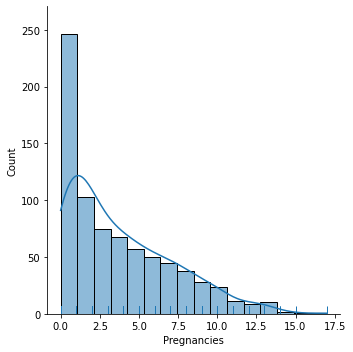

<Figure size 1440x1440 with 0 Axes>

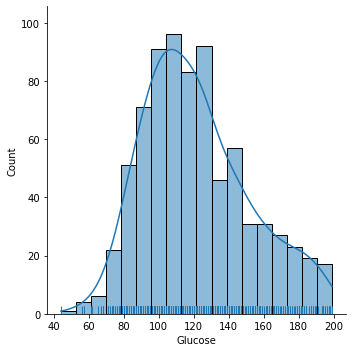

<Figure size 1440x1440 with 0 Axes>

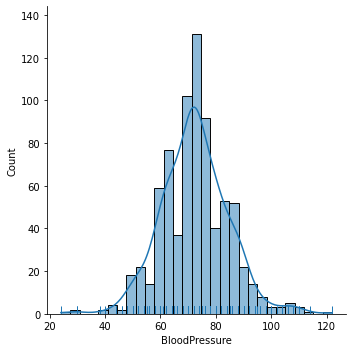

<Figure size 1440x1440 with 0 Axes>

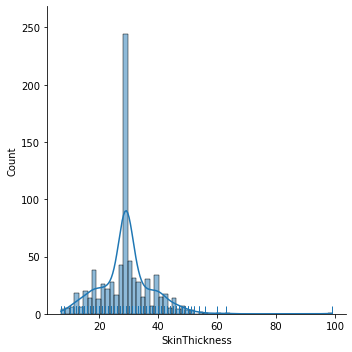

<Figure size 1440x1440 with 0 Axes>

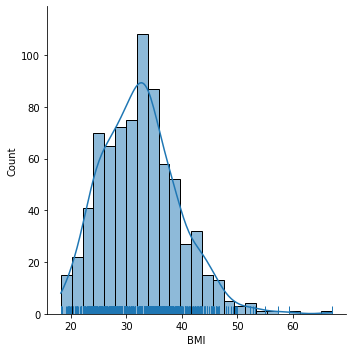

<Figure size 1440x1440 with 0 Axes>

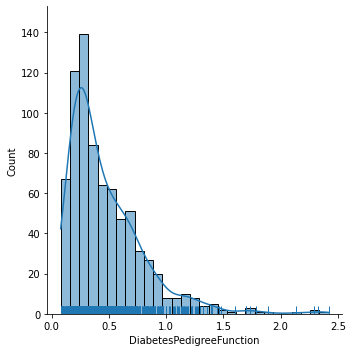

<Figure size 1440x1440 with 0 Axes>

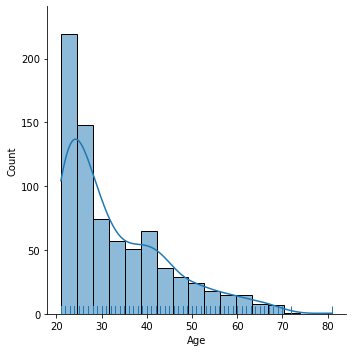

In [167]:
for i,col in enumerate(data.columns[:-1]):
    plt.figure(figsize=(20,20))
    sns.displot(data = data[col] , kde=True , rug= True)

### Scatter Matrix 

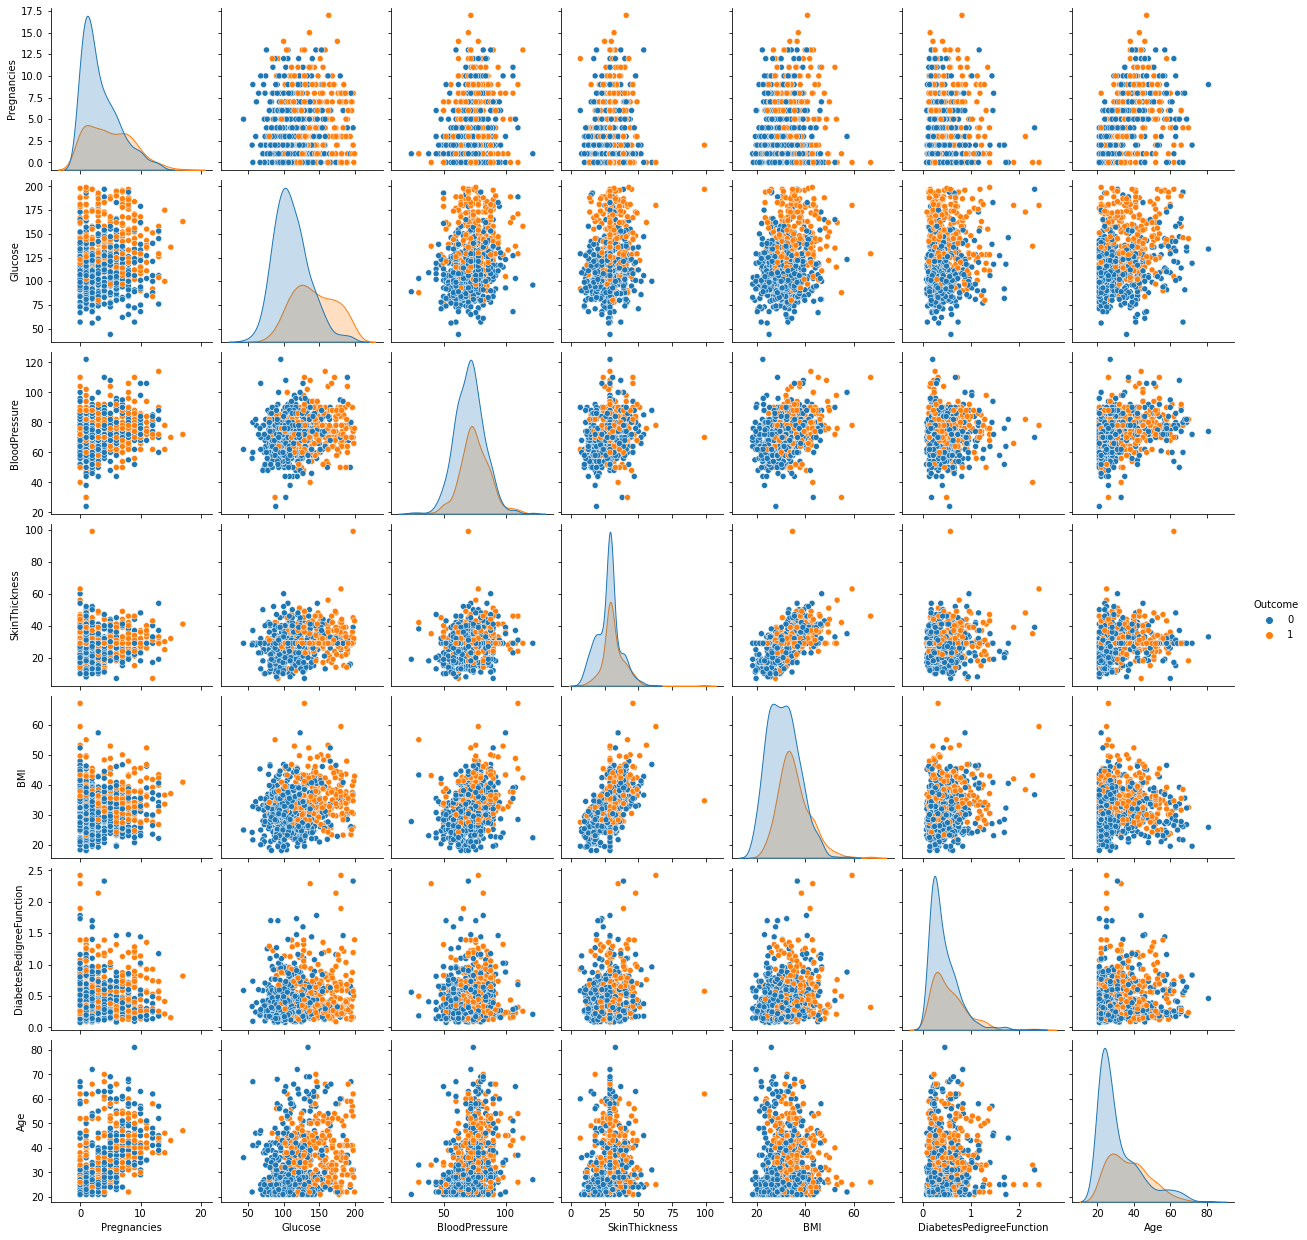

In [158]:
sns.pairplot(data=data,hue='Outcome',diag_kind='kde')

## Blue data for  non-diabetics people orange means diabetics people

## Correlation Plots

##### to easily identify which attributes are correlated with others 

♥ Correlation is usually an indicative of good information content 
♥ So in analysis we might want to use variables that are correlated with our outcome variable

In [160]:
data.corr()

# We can see which varibale is highly correlated with my outcome variable .
#this is vary important analysis (Glucose vs Outcome Highly correlated)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.543205,0.102188,0.126107,0.214873
BMI,0.021559,0.231049,0.281257,0.543205,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.312038,0.173844,0.238356,1.000000


<AxesSubplot:>

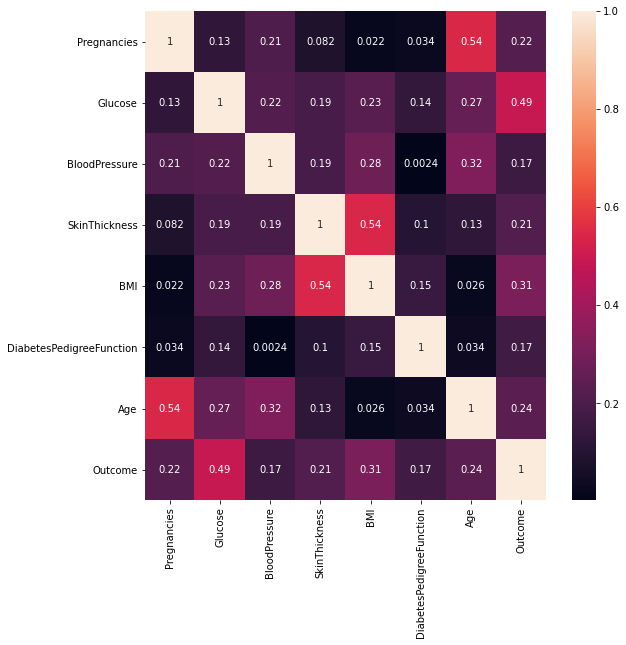

In [170]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.corr()),annot=True)

***We can see age and pregnancies is highly corr but it's common sense that with the increase of age of a woman hava more number of pregnancies ***

***Same as BMI vs SkinThickness***

## Covariance Plot
Covariance is a meassure how much two random variable vary together
in other word it is join spread between two random variable 
www.statisticshowto.com/covariance/


In [172]:
data.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.150057,8.503285,2.422243,0.499439,-0.037426,21.570620,0.356618
Glucose,13.150057,926.489244,80.612899,51.541762,48.351206,1.384952,95.543147,7.154009
BloodPressure,8.503285,80.612899,146.328741,20.406652,23.391138,-0.009532,46.222239,0.956140
SkinThickness,2.422243,51.541762,20.406652,77.285567,32.831966,0.297652,13.037818,0.900960
BMI,0.499439,48.351206,23.391138,32.831966,47.268056,0.349522,2.069604,1.023213
DiabetesPedigreeFunction,-0.037426,1.384952,-0.009532,0.297652,0.349522,0.109779,0.130772,0.027472
Age,21.570620,95.543147,46.222239,13.037818,2.069604,0.130772,138.303046,1.336953
Outcome,0.356618,7.154009,0.956140,0.900960,1.023213,0.027472,1.336953,0.227483


<AxesSubplot:>

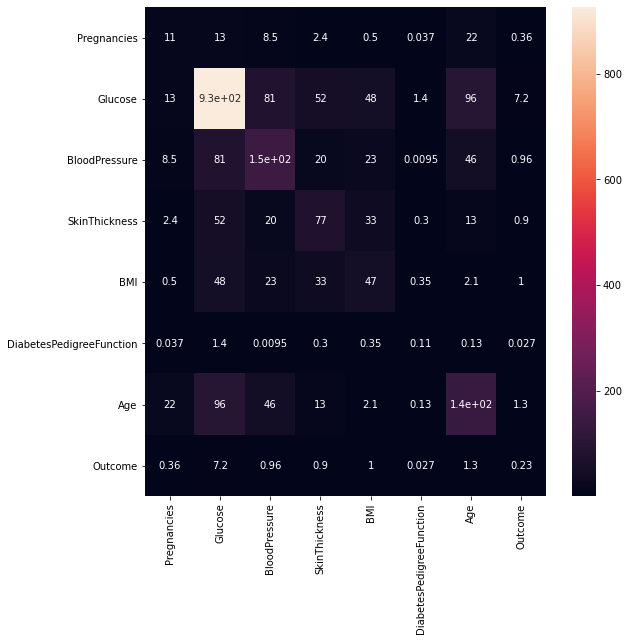

In [173]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.cov()),annot=True)
#this is not important too much

## Box plot, Violin Plots and Bee Swarm Plots

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

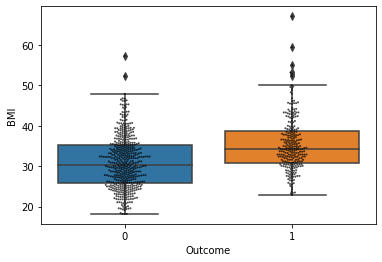

In [188]:
sns.boxplot(x='Outcome' , y = 'BMI',data=data)
sns.swarmplot(x='Outcome',y ='BMI',data = data,size=2 , color = 'k',alpha=0.7)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

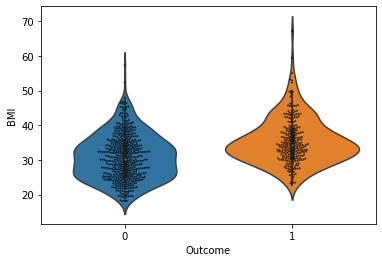

In [190]:
sns.violinplot(x='Outcome' , y = 'BMI',data=data)
sns.swarmplot(x='Outcome',y ='BMI',data = data,size=2 , color = 'k',alpha=0.7)

# 2D Histograms
Useful when we have atleast 1000's of data

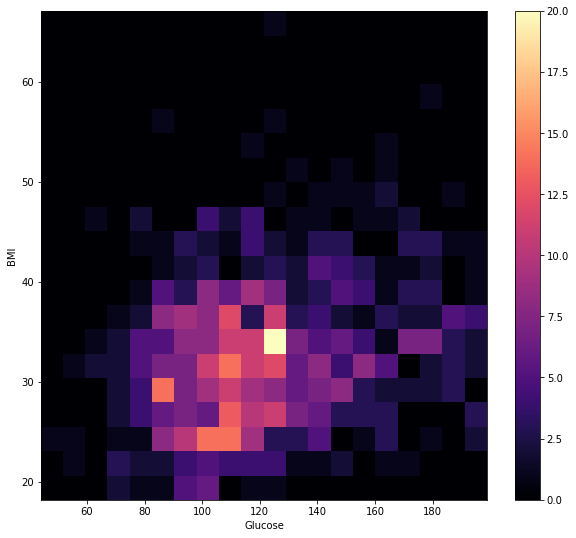

In [192]:
plt.figure(figsize=(10,9))
plt.hist2d(data['Glucose'], data['BMI'],bins=(20,20),cmap='magma'  )
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.colorbar();

C:\Users\amitn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

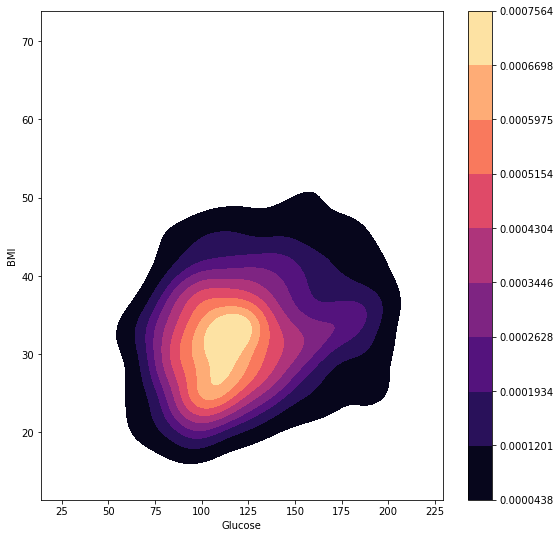

In [196]:
plt.figure(figsize=(9,9))
sns.kdeplot(data['Glucose'],data['BMI'],cmap='magma',shade=True,cbar=True)

#like a mountain highlight part is peek of mountain 

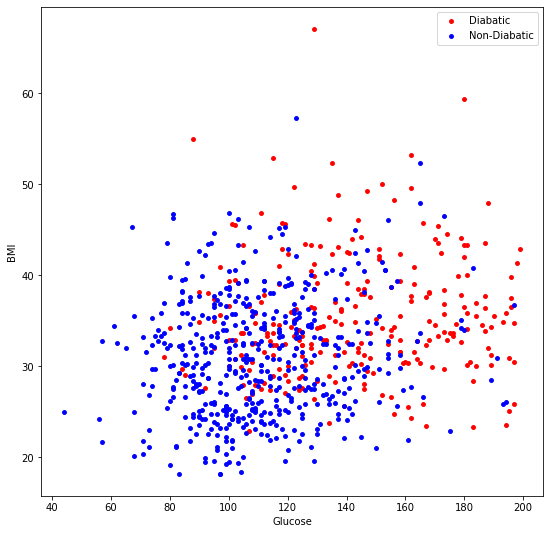

In [204]:
plt.figure(figsize=(9,9))
m = data['Outcome']==1
plt.scatter(data.loc[m,'Glucose'] ,data.loc[m,'BMI'],c='r',label='Diabatic',s=15)
plt.scatter(data.loc[-m,'Glucose'],data.loc[-m,'BMI'],c='b',label='Non-Diabatic',s=15)
plt.xlabel("Glucose")
plt.ylabel('BMI')
plt.legend()

♥Looking at the scatter plot above , we can make some useful informed guesses.
♥ Given the level Glucose and BMI of a random person , we can guess if thay are diabetic or not.

# 3- A Probabilistic analysis
Based on the previous Correlation Plot , a sample approch might be just to use the top correlated variable and investigate them further . In our case they are Glucose , BMI and age 
♥ We will not use 'Pregnacies ' because we will not pay attention to Gender
♥ And we will not use 'DiabetesPedgreeFunc' because we do not expect patients to know its value when they come to clinic

In [206]:
data1 = data[['Glucose','BMI','Age','Outcome']]

In [207]:
data1.shape

(768, 4)

In [208]:
# Splite the data into 2 dataframe , one for diabetic and other for Non Diabetic
df_y = data.loc[data['Outcome']==1,['Glucose','BMI','Age']]
df_n = data.loc[data['Outcome']==0,['Glucose','BMI','Age']]
df_y.head()

,Glucose,BMI,Age
0,148.0,33.6,50
2,183.0,23.3,32
4,137.0,43.1,33
6,78.0,31.0,26
8,197.0,30.5,53


In [213]:
df_y.shape

(268, 3)

In [215]:
# Create a instance of 3d plot using the two sub datasets 
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_y['Glucose'],y=df_y['BMI'],z=df_y['Age'],mode='markers',name='Diabetic'))
fig.add_trace(go.Scatter3d(x=df_n['Glucose'],y=df_n['BMI'],z=df_n["Age"],mode='markers',name='Non-Diabetic'))
fig.show()

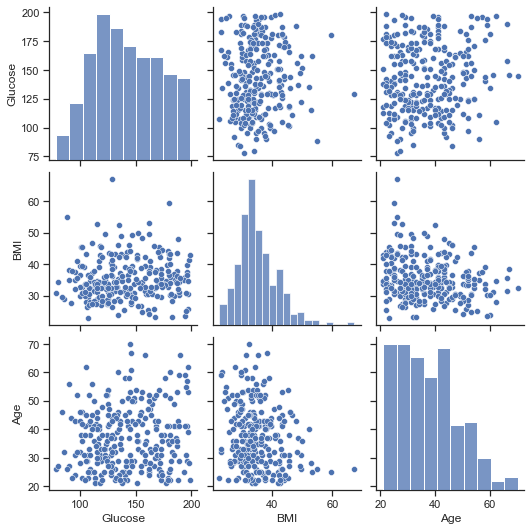

In [221]:
#Scatter Matrix for diabetic dataframe
#sns.set(style='ticks')
sns.pairplot(df_y)

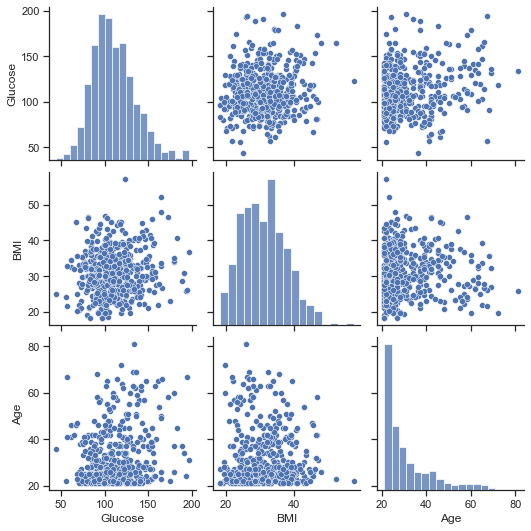

In [222]:
#Scatter Matrix for non-diabetic dataframe
sns.pairplot(df_n)

## Multivariate Normal Distribution

alows us to model Glucose , BMI, Age as a normal 3 dimensions rather then 3 independent normal . THat way we can have correlations between them 

### Plot the data in 3D and Add a Test Piont

In [225]:
# our test point , this could be our patient who just come
test_point = [110,35,52]

## Here we are adding our test point into 3d plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_y['Glucose'],y=df_y['BMI'],z=df_y['Age'],mode='markers',name='Diabetic'))
fig.add_trace(go.Scatter3d(x=df_n['Glucose'],y=df_n['BMI'],z=df_n["Age"],mode='markers',name='Non-Diabetic'))
fig.add_trace(go.Scatter3d(x=[test_point[0]],y=[test_point[1]],z=[test_point[2]],mode='markers',name='Test'))
fig.show()

In [228]:
# Here we take each subdataset seperately , fit a multivaiate Normal PDF to it
# and then use the pdf to predict the probability of our test point belongging to 
#data of the same type as the subdataset (diabetic or non-diabetic)
data_test = []

for d in [df_y,df_n]:
    mean = np.mean(d)# compute Mean of each dataset 
        

Glucose    142.130597
BMI         35.383582
Age         37.067164
dtype: float64
Glucose    110.6820
BMI         30.8856
Age         31.1900
dtype: float64


In [233]:
# Here we take each subdataset seperately , fit a multivaiate Normal PDF to it
# and then use the pdf to predict the probability of our test point belongging to 
#data of the same type as the subdataset (diabetic or non-diabetic)
prob_test = []

for d in [df_y,df_n]:
    mean = np.mean(d)# compute Mean of each dataset 
    cov = np.cov(d,rowvar=0) # Compute the covariance of our subdataset
    #Here we evaluate the probabilities at all points we have prepared previously
    # Basically we pass the points to the pdf and say evaluate it using this mean and covariance
    prob = mn.pdf(test_point,mean,cov)
    prob_test.append(prob)
print(prob_test)

[5.306391455905808e-06, 5.240911916383735e-06]


In [240]:
# Here we compute weighted probability of the test_point being Positive(Diabetic)
# Notice weighting apply

num_y = df_y.shape[0]
num_n= df_n.shape[0]

print("Number of people with diabetes is :",num_y)
print("Number of people with Non-diabetes is :",num_n)
prob_diagnosis = num_y * prob_test[0] / (num_y * prob_test[0] +num_n * prob_test[1])
print("Positive Diagnosis chance is ",100 * prob_diagnosis ,"%")

Number of people with diabetes is : 268
Number of people with Non-diabetes is : 500
Positive Diagnosis chance is  35.17844609421679 %


In [243]:
num_y = df_y.shape[0]
num_n= df_n.shape[0]

print("Number of people with diabetes is :",num_y)
print("Number of people with Non-diabetes is :",num_n)
prob_diagnosis = num_n * prob_test[1] / (num_n* prob_test[1] +num_y * prob_test[0])
print("Negetive Diagnosis chance is ",100 * prob_diagnosis ,"%")

Number of people with diabetes is : 268
Number of people with Non-diabetes is : 500
Negetive Diagnosis chance is  64.82155390578322 %


In [244]:
df_y.head()

,Glucose,BMI,Age
0,148.0,33.6,50
2,183.0,23.3,32
4,137.0,43.1,33
6,78.0,31.0,26
8,197.0,30.5,53


In [248]:
test_point = [186 ,34.6,37]

prob_test = []

for d in [df_y,df_n]:
    mean = np.mean(d)# compute Mean of each dataset 
    cov = np.cov(d,rowvar=0) # Compute the covariance of our subdataset
    #Here we evaluate the probabilities at all points we have prepared previously
    # Basically we pass the points to the pdf and say evaluate it using this mean and covariance
    prob = mn.pdf(test_point,mean,cov)
    prob_test.append(prob)
print(prob_test)

prob_diagnosis = num_y * prob_test[0] / (num_y * prob_test[0] +num_n * prob_test[1])
print("Positive Diagnosis chance is ",100 * prob_diagnosis ,"%")

[9.72125479036712e-06, 3.235035827855186e-07]
Positive Diagnosis chance is  94.15435558052542 %


## 4 - Predicting Diabetes with Logistic Regression 

Logistic Regression measures the relationship between the dependent varibale and one or more independent variable by estimating probabilities using underlying logistic function
♥These probabilities must then be transformed into binary values in order to actually make a prediction
♥This is the task of the logistic function , also called the sigmoid function
♥ this sigmoid function is s -shaped curve that can take any ral - valued number and map it into a value between the range of 0 and 1 but never exactly those limits.
♥ The values between 0 and 1 will then be transformed into either 0 and 1 using threeshold classifier 



In [249]:
data1.head()

,Glucose,BMI,Age,Outcome
0,148.0,33.6,50,1
1,85.0,26.6,31,0
2,183.0,23.3,32,1
3,89.0,28.1,21,0
4,137.0,43.1,33,1


In [258]:
x = data1.drop(columns='Outcome')
x
y = data1['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [285]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1 ,random_state=10 , stratify=y)

In [286]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [287]:
accuracy = model.score(x_test,y_test)
print('Model Accuracy is :',accuracy*100,'%')

Model Accuracy is : 85.71428571428571 %


In [302]:
coef = list(model.coef_[0])
labels = data1.columns[:-1]
features['Features'] = pd.DataFrame(labels)
features.drop(columns=0,inplace=True)

In [303]:
features

,Features
0,Glucose
1,BMI
2,Age


In [304]:
features['importance'] = coef

features.sort_values(by='importance',inplace=True,ascending=True)
features['possitive'] = features['importance'] >0
features.set_index('Features', inplace=True)
features

,importance,possitive
Features,,
Age,0.028833,True
Glucose,0.033956,True
BMI,0.087499,True


<AxesSubplot:ylabel='Features'>

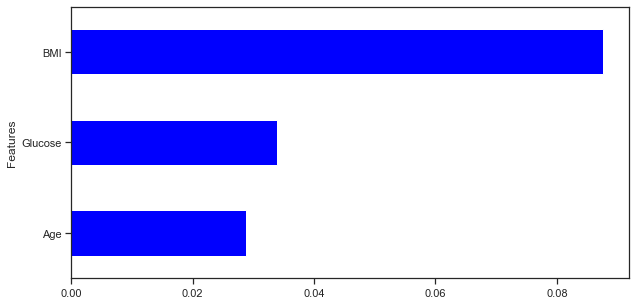

In [319]:
features.importance.plot(kind='barh',color = features.possitive.map({True: 'blue' , False : 'red'}) ,figsize=(10,5))
#features.importance.plot(kind='barh')

# According to logistic model BMI have highst Contribution in predecting 

<AxesSubplot:>

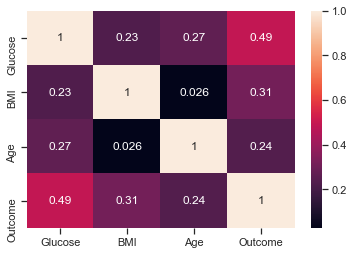

In [323]:
# according to correlation Glucose is highly correlated
sns.heatmap(data1.corr(),annot=True)

In [324]:
test_point = [[110,35,52]]
model.predict(test_point)

array([0], dtype=int64)

In [328]:
res = model.predict_proba(test_point)
res

array([[0.61077987, 0.38922013]])

In [329]:
print("Negetive Probablity :",res[0][0])
print("positive Probablity :" , res[0][1])

Negetive Probablity : 0.6107798694628734
positive Probablity : 0.38922013053712656


In [330]:
test_point = [[186 ,34.6,37]]
res = model.predict_proba(test_point)
print("Negetive Probablity :",res[0][0])
print("positive Probablity :" , res[0][1])

Negetive Probablity : 0.15942156167338217
positive Probablity : 0.8405784383266178
